In [1]:
import os
import sys

import pandas as pd
import numpy as np
import typing

sys.path.append(os.path.abspath("../common"))  # add path to common functions
from evaluate import evaluate_predictions
from preprocess import getdfs, get_char_columns
from preprocess import one_hot_encode
from models import predict_logistic_regression
from models import grid_search_
from models import predict_xgboost

In [2]:
emo_df, emo_val_df = getdfs('emoticon')

In [3]:
emo_df = get_char_columns(emo_df)
emo_df.head()


,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,c_12,c_13,label
0,😛,🛐,😻,😑,😣,🙠,🙯,🚼,😒,🙼,😑,🙯,😣,0
1,🛐,😑,😪,😛,🚼,🙯,😣,🚅,😑,🙯,😹,😣,🙼,0
2,😛,🙯,😑,🚡,😣,🚼,🛐,🙲,😣,🙯,🛑,😑,🙼,0
3,😛,🚼,🛐,🙐,😣,🙯,😑,🙪,😑,🙼,🛆,😣,🙯,1
4,🛐,🚟,🚼,😛,🙋,😑,😣,🙯,😹,🙯,😑,😣,🙼,1


In [4]:

repeat_emos = ['🙼', '🛐', '🙯', '😛', '😣', '😑', '🚼']

repeat_emo_code = {
     '🙼' : '284',
     '🛐' : '464', 
     '🙯' : '262',
     '😛' : '15436', 
     '😣' : '614',
     '😑' : '1596', 
     '🚼' : '422'
}

In [5]:
train_df, valid_df = getdfs('text_seq')

In [6]:
def remove_substrings(input_string, substrings):
    """
    Removes all occurrences of substrings from the input string.

    Parameters:
    input_string (str): The string to remove substrings from.
    substrings (list): List of substrings to remove from the input string.

    Returns:
    str: The input string with substrings removed.
    """
    for substring in substrings:
        input_string = input_string.replace(substring, "")
    return input_string


In [7]:
def process_strings ( strs : typing.List[str] )-> typing.List[str]:
    strs = [x.lstrip('0') for x in strs]

    # Example usage
    substrings = repeat_emo_code.values()

    # Remove the substrings
    strs = [remove_substrings(input_string, substrings) for input_string in strs]

    padded_strs = []

    for s in strs:
        if len(s) < 15:
            s = s + '0'*(15-len(s))
        padded_strs.append(s)

    return padded_strs

In [8]:
train_df['input_str'] = process_strings(train_df['input_str'])
valid_df['input_str'] = process_strings(valid_df['input_str'])

In [11]:
num_feat = 15

def get_columns (df) :
    for i in range(num_feat):
        df[f'c_{i}'] = df['input_str'].apply(lambda x : x[i])
    return df.drop(columns = ['input_str'])

train_df = get_columns(train_df)
valid_df = get_columns(valid_df)

In [12]:
for col in train_df.columns[1:] :
    print(train_df[col].nunique())

10
10
10
10
10
10
10
10
10
10
10
10
10
10
2


## One Hot Encoding

In [11]:
# Feature engineering (example: one-hot encoding)
from sklearn.preprocessing import OneHotEncoder
from preprocess import one_hot_encode

train_df, valid_df, y_train, y_valid = one_hot_encode(train_df, valid_df)

(7080, 142) (489, 142)


In [12]:
y_valid.shape

(489,)

In [13]:
x_train = train_df.values
x_valid = valid_df.values

In [14]:
from models import predict_random_forest, predict_xgboost, predict_mlp, predict_logistic_regression, predict_svc
from evaluate import evaluate_predictions
import matplotlib.pyplot as plt

==========Random Forest==========
              precision    recall  f1-score   support

     Class 0       0.81      0.84      0.82       252
     Class 1       0.82      0.78      0.80       237

    accuracy                           0.81       489
   macro avg       0.81      0.81      0.81       489
weighted avg       0.81      0.81      0.81       489

Accuracy is 0.8118609406952966
==========Random Forest==========


/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:24:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


==========XGBoost==========
              precision    recall  f1-score   support

     Class 0       0.89      0.83      0.86       252
     Class 1       0.83      0.89      0.86       237

    accuracy                           0.86       489
   macro avg       0.86      0.86      0.86       489
weighted avg       0.87      0.86      0.86       489

Accuracy is 0.8629856850715747
==========XGBoost==========
==========Logistic Regression==========
              precision    recall  f1-score   support

     Class 0       0.70      0.69      0.69       252
     Class 1       0.67      0.68      0.68       237

    accuracy                           0.69       489
   macro avg       0.68      0.69      0.68       489
weighted avg       0.69      0.69      0.69       489

Accuracy is 0.6850715746421268
==========Logistic Regression==========
==========MLP==========
              precision    recall  f1-score   support

     Class 0       0.83      0.82      0.83       252
     Class 1   

/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


==========SVC==========
              precision    recall  f1-score   support

     Class 0       0.81      0.79      0.80       252
     Class 1       0.78      0.80      0.79       237

    accuracy                           0.79       489
   macro avg       0.79      0.79      0.79       489
weighted avg       0.79      0.79      0.79       489

Accuracy is 0.7934560327198364
==========SVC==========


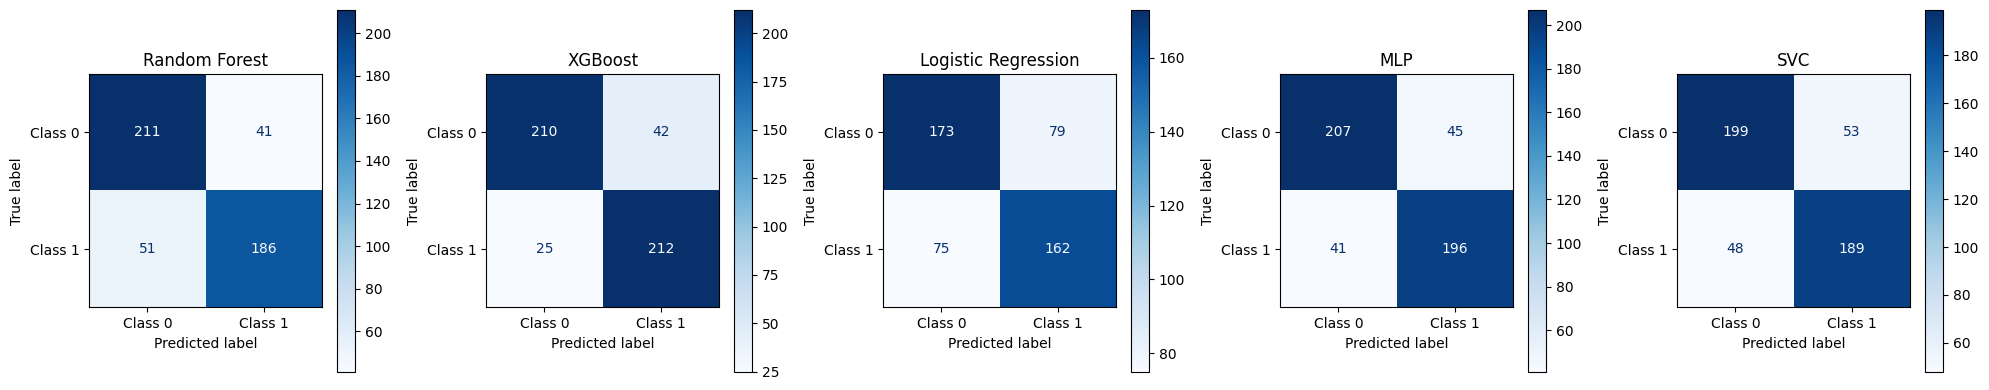

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # 1 row, 5 columns grid

y_pred_rf = predict_random_forest(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_rf, 'Random Forest', ax=axes[0])

y_pred_xgb = predict_xgboost(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_xgb, 'XGBoost', ax=axes[1])

y_pred_lr = predict_logistic_regression(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_lr, 'Logistic Regression', ax=axes[2])

y_pred_mlp = predict_mlp(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_mlp, 'MLP', ax = axes[3])

y_pred_svc = predict_svc(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_svc, 'SVC', ax = axes[4])

plt.tight_layout()
plt.show()